# 1. Data Collection and Manipulation

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd

folder_path = "./archive/"

In [2]:
# Create a df with labels and corresponding image name
csv_file_name = "Training_set.csv"
df = pd.read_csv(os.path.join(folder_path, csv_file_name))

# select only 10-15 class for classification
selected_species = ['CRECENT',
                    'ATALA',
                    'ORANGE TIP',
                    'MOURNING CLOAK', 
                    'MILBERTS TORTOISESHELL',
                    'SCARCE SWALLOW',
                    'SLEEPY ORANGE', 
                    'RED CRACKER',
                    'BANDED ORANGE HELICONIAN', 
                    'BROWN SIPROETA', 
                    ]

df = df[df['label'].str.upper().isin(selected_species)].reset_index(drop=True)
#display(df)

In [14]:
# Check if the image format is valid and verify if TensorFlow can load the image, otherwise mark it as invalid.

images_path = "train"
images_folder_path = os.path.join(folder_path, images_path)
invalid_images = []
dataset = []
target_size = (224, 224)

for filename in df['filename']:
    file_path = os.path.join(images_folder_path, filename)
    print(filename)
    if os.path.isfile(file_path):
        
        # Check if the file extension is a supported image format
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Invalid Extension for {filename}.")
            invalid_images.append(filename)
            continue

        # Try loading and preprocessing the image
        try:
            img = tf.keras.preprocessing.image.load_img(file_path)  # Load the image
            img = img.resize(target_size)  # Resize to the target dimensions
            numeric_img = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to a numeric array
            numeric_img = numeric_img / 255.  # Normalize pixel values to range [0, 1]
            dataset.append(numeric_img)  # Add the preprocessed image to the dataset
        except Exception as e:
            print(f"Error loading {filename}: {e}.")
            invalid_images.append(filename)
    else:
        print(f"Skipping {filename}, not a file.")
print("images checked")
dataset_np = np.array(dataset)

print()
print("Invalid images list:", invalid_images)

# Update the df with valid images only
df = df[~df['filename'].isin(invalid_images)].reset_index(drop=True)


#-------------------------------------------------------------------
# Delete invalid images from disk (uncomment to enable deletion)

# for invalid_file in invalid_images:
#     file_path = os.path.join(images_folder_path, invalid_file)
#     try:
#         os.remove(file_path)
#         print(f"Deleted: {invalid_file}")
#     except Exception as e:
#         print(f"Failed to delete {invalid_file}: {e}")

Image_3.jpg
Image_9.jpg
Image_30.jpg
Image_45.jpg
Image_53.jpg
Image_59.jpg
Image_72.jpg
Image_73.jpg
Image_74.jpg
Image_92.jpg
Image_97.jpg
Image_104.jpg
Image_105.jpg
Image_107.jpg
Image_111.jpg
Image_120.jpg
Image_129.jpg
Image_141.jpg
Image_143.jpg
Image_148.jpg
Image_150.jpg
Image_153.jpg
Image_170.jpg
Image_177.jpg
Image_191.jpg
Image_198.jpg
Image_211.jpg
Image_212.jpg
Image_220.jpg
Image_225.jpg
Image_234.jpg
Image_237.jpg
Image_251.jpg
Image_253.jpg
Image_259.jpg
Image_266.jpg
Image_272.jpg
Image_275.jpg
Image_276.jpg
Image_278.jpg
Image_283.jpg
Image_286.jpg
Image_292.jpg
Image_295.jpg
Image_297.jpg
Image_309.jpg
Image_313.jpg
Image_317.jpg
Image_323.jpg
Image_334.jpg
Image_341.jpg
Image_349.jpg
Image_359.jpg
Image_373.jpg
Image_375.jpg
Image_380.jpg
Image_381.jpg
Image_382.jpg
Image_391.jpg
Image_397.jpg
Image_398.jpg
Image_403.jpg
Image_406.jpg
Image_408.jpg
Image_413.jpg
Image_430.jpg
Image_443.jpg
Image_448.jpg
Image_454.jpg
Image_458.jpg
Image_471.jpg
Image_472.jpg
Image

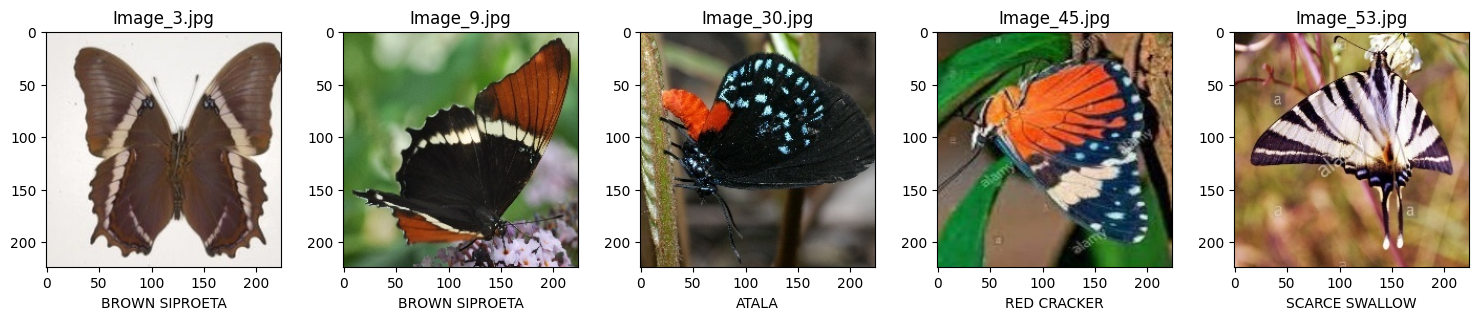

In [15]:
# check on dataset grid
img_index = 0
plt.figure(figsize=(15, 3))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(dataset_np[img_index + i])
    plt.xlabel(df.loc[img_index + i, 'label'])
    plt.title(df.loc[img_index + i, 'filename'])

plt.tight_layout()
plt.show()

In [16]:
# Create array for labels
labels = df['label'].values

# change from string label to numeric label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

In [17]:
# check on dataset 
# img_index = 0
# plt.figure(figsize=(15, 3))

# for i in range(5):
#     plt.subplot(1, 5, i+1)
#     plt.imshow(dataset_np[img_index + i])
#     plt.xlabel(labels_encoded[img_index + i])
#     plt.title(df.loc[img_index + i, 'filename'])

# plt.tight_layout()
# plt.show()

### Train Validation and Test
A split of 70% training, 15% validation, and 15% testing is chosen. The training and validation sets are used to fit the model and prevent overfitting, while the test set provides an unbiased assessment of the model’s performance.

In [18]:
#default shuffle is true, stratify=labels_encoded, stratify=y_temp

from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    dataset_np, labels_encoded, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42) # here test size is to ensure that is 15% of total, so 17.6% of 85% of total

# 2. Model Creation

In [19]:
X_train.shape

(711, 224, 224, 3)

In [20]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input

input_size = (target_size[0], target_size[1], 3)
number_of_classes = len(selected_species)

model = models.Sequential()
model.add(Input(input_size))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(number_of_classes))

# Model visualization
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,384,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,423,018 (5.43 MB)

 Trainable params: 1,423,018 (5.43 MB)

 Non-trainable params: 0 (0.00 B)

# 3. Model Training and Performance Evaluation

In this stage, the model is trained. Performance evaluation will be conducted only on the test sets, after parameter estimation and optimization have been completed.

### Training

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,                 # Number of epochs to wait without improvement before stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy']
            )
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop], batch_size=32  
                    )

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 725ms/step - accuracy: 0.3108 - loss: 1.9685 - val_accuracy: 0.3750 - val_loss: 1.6287
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 708ms/step - accuracy: 0.6498 - loss: 1.0939 - val_accuracy: 0.6382 - val_loss: 0.9276
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 643ms/step - accuracy: 0.8143 - loss: 0.5973 - val_accuracy: 0.7237 - val_loss: 0.7829
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 673ms/step - accuracy: 0.9100 - loss: 0.3173 - val_accuracy: 0.8026 - val_loss: 0.7053
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 655ms/step - accuracy: 0.9437 - loss: 0.1896 - val_accuracy: 0.7500 - val_loss: 0.7332
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 626ms/step - accuracy: 0.9691 - loss: 0.0978 - val_accuracy: 0.7566 - val_loss: 0.8026
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 625ms/step - accuracy: 0.9817 - loss: 0.0899 - val_accuracy: 0.7500 - val_loss: 0.9404
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 663ms/step - accuracy: 0.9887 - loss: 0.0464 - 

#### Accuracy Graphic Representation

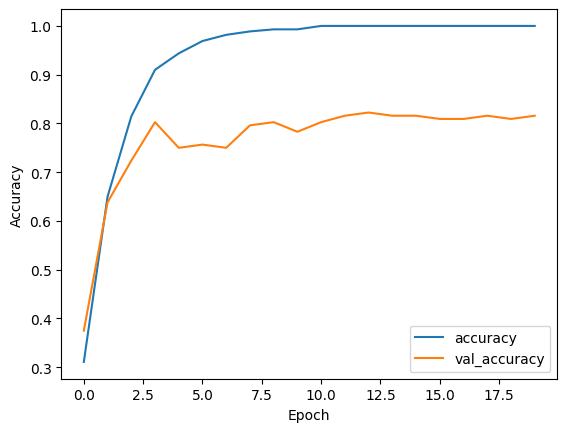

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')

plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

### Performance Evaluation:

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy on test set: ",test_acc)
print("Loss on test set: ",test_loss)

5/5 - 1s - 102ms/step - accuracy: 0.8235 - loss: 0.9562
Accuracy on test set:  0.8235294222831726
Loss on test set:  0.9561863541603088


# 4. Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


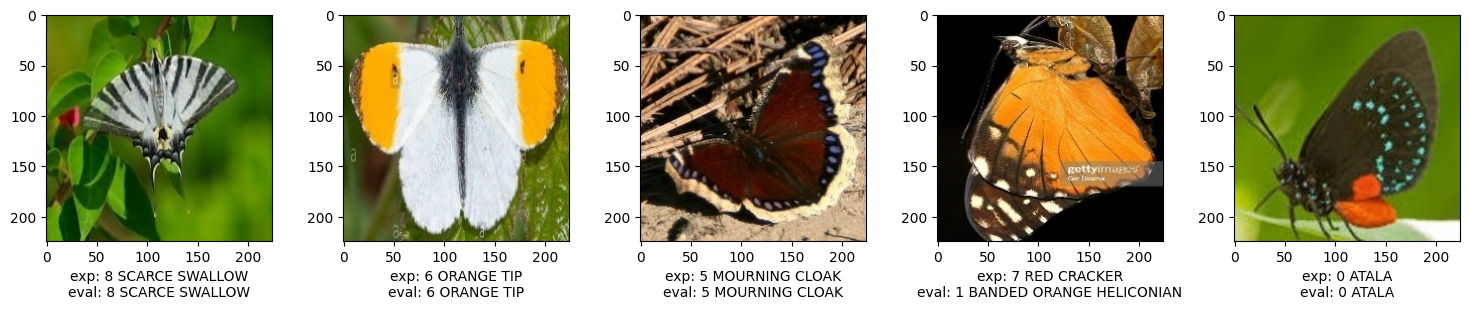

In [24]:
# check on Test set images grid
img_index = 0
plt.figure(figsize=(15, 3))

for i in range(5):
    img_batch = np.expand_dims(X_test[img_index + i], axis=0)
    prediction = model.predict(img_batch)
    predicted_class_idx = np.argmax(prediction[0])
    predicted_class_name = le.inverse_transform([predicted_class_idx])[0]
    
    true_class_idx = y_test[img_index + i]
    true_class_name = le.inverse_transform([true_class_idx])[0]
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[img_index + i])
    plt.xlabel(f"exp: {true_class_idx} {true_class_name}\neval: {predicted_class_idx} {predicted_class_name}")
    #plt.title(df.loc[img_index + i, 'filename'])
plt.tight_layout()
plt.show()